In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go

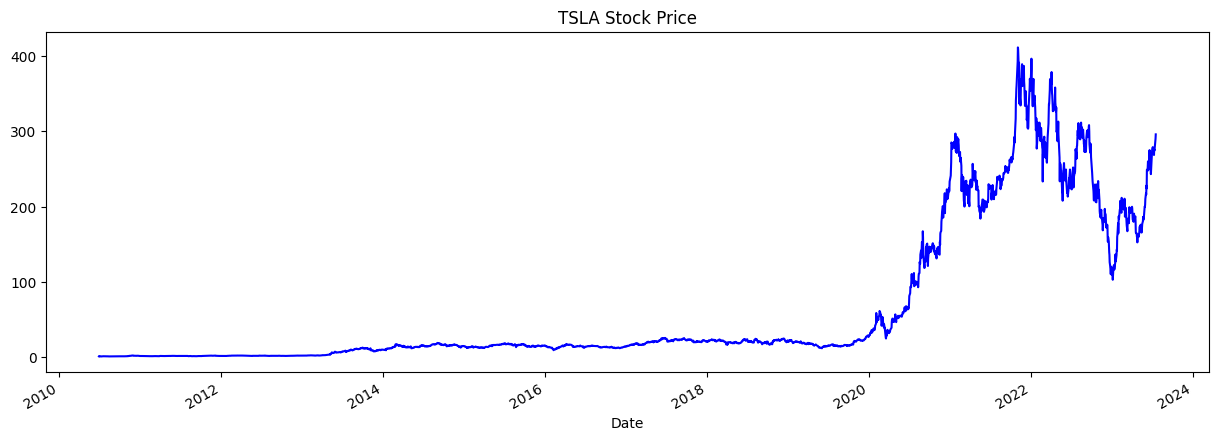

In [56]:
tsla = yf.Ticker("TSLA")
hist = tsla.history(period="max")
hist["Open"].plot(figsize=(15, 5), color='blue', title="TSLA Stock Price")
plt.show()

In [57]:
# Importing the training set
dataset_train = pd.read_csv('../Simulation-HFT-Sentiment-Analyze-From-yFinance-byCat/TSLA.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [58]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [59]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [60]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [61]:
# Building the RNN by Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [62]:
# Initialising the RNN
regressor = Sequential()

In [63]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [64]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [65]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [66]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [67]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [68]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [69]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
38/38 [==============================] - 14s 137ms/step - loss: 9.4996e-05
Epoch 2/25
38/38 [==============================] - 6s 151ms/step - loss: 1.0625e-05
Epoch 3/25
38/38 [==============================] - 6s 150ms/step - loss: 1.1968e-05
Epoch 4/25
38/38 [==============================] - 7s 181ms/step - loss: 1.2994e-05
Epoch 5/25
38/38 [==============================] - 6s 169ms/step - loss: 1.0570e-05
Epoch 6/25
38/38 [==============================] - 7s 173ms/step - loss: 9.4079e-06
Epoch 7/25
38/38 [==============================] - 6s 170ms/step - loss: 9.8946e-06
Epoch 8/25
38/38 [==============================] - 7s 170ms/step - loss: 7.7937e-06
Epoch 9/25
38/38 [==============================] - 6s 156ms/step - loss: 8.2598e-06
Epoch 10/25
38/38 [==============================] - 6s 150ms/step - loss: 7.7683e-06
Epoch 11/25
38/38 [==============================] - 6s 151ms/step - loss: 7.6111e-06
Epoch 12/25
38/38 [==============================] - 6s 150ms/

In [ ]:
# Making the predictions and visualising the results By Getting the real and predicted stock price

dataset_test = pd.read_csv('../Simulation-HFT-Sentiment-Analyze-From-yFinance-byCat/TSLA.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 3346): #we have 3286 in dataset so we will calculate the range from (60 + 3286 = 3346),
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Epoch 1/25
38/38 [==============================] - 14s 141ms/step - loss: 1.0592e-04
Epoch 2/25
38/38 [==============================] - 5s 143ms/step - loss: 1.5638e-05
Epoch 3/25
38/38 [==============================] - 6s 145ms/step - loss: 1.1280e-05
Epoch 4/25
38/38 [==============================] - 5s 144ms/step - loss: 1.0999e-05
Epoch 5/25
38/38 [==============================] - 6s 146ms/step - loss: 9.7024e-06
Epoch 6/25
38/38 [==============================] - 6s 157ms/step - loss: 1.0129e-05
Epoch 7/25
38/38 [==============================] - 6s 149ms/step - loss: 1.3550e-05
Epoch 8/25
38/38 [==============================] - 6s 151ms/step - loss: 1.0052e-05
Epoch 9/25
38/38 [==============================] - 6s 156ms/step - loss: 7.9655e-06
Epoch 10/25
38/38 [==============================] - 7s 180ms/step - loss: 8.3738e-06
Epoch 11/25
38/38 [==============================] - 7s 182ms/step - loss: 7.3037e-06
Epoch 12/25
38/38 [==============================] - 7s 180ms/

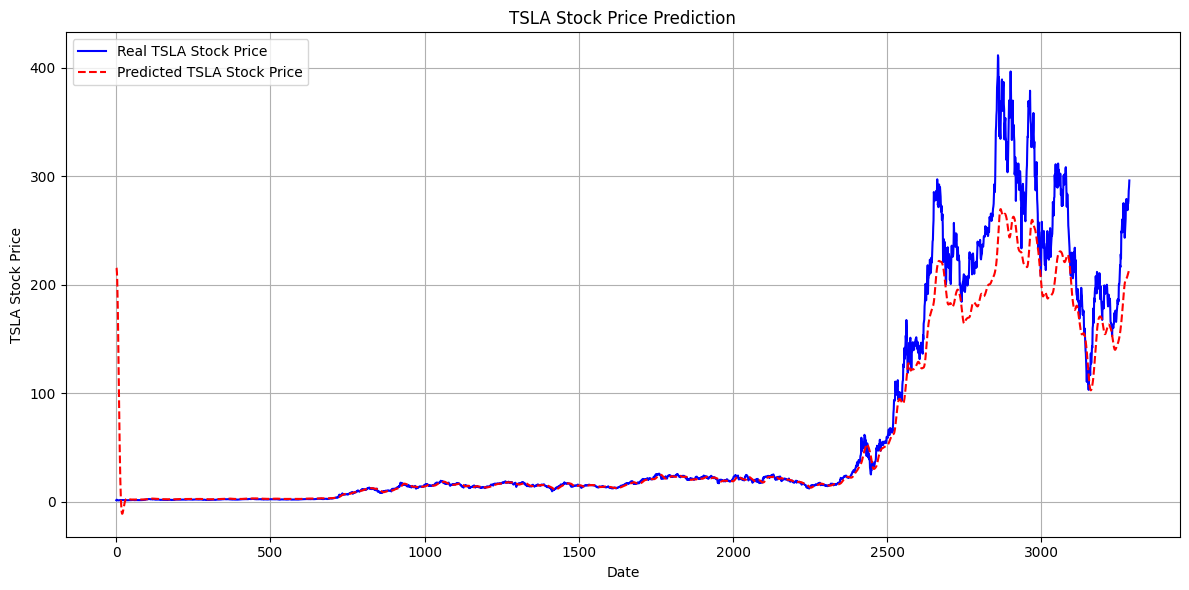

In [ ]:
# Visualising the results
plt.figure(figsize=(12, 6)) 
plt.plot(real_stock_price, color='blue', linestyle='-', label='Real TSLA Stock Price')
plt.plot(predicted_stock_price, color='red', linestyle='--', label='Predicted TSLA Stock Price')
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Date') 
plt.ylabel('TSLA Stock Price')
plt.grid(True) 
plt.legend(loc='upper left') 
plt.tight_layout() 
plt.show()

In [ ]:
#The End